<a href="https://colab.research.google.com/github/wadhwaniv1/Git-learning-repo/blob/master/Handwritten_number_text_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

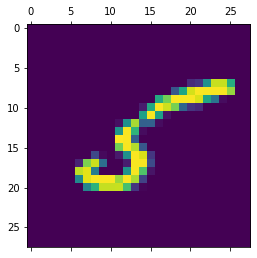

In [12]:
plt.matshow(x_train[11])

In [14]:
y_train[11]

5

In [25]:
x_train[0].shape

x_train = x_train/255
x_test = x_test/255

In [26]:
#Flatten the 2D array 

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [27]:
#Building neural network
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

#Compiling a model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training a model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7272 - accuracy: 0.8112
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3087 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2700 - accuracy: 0.9239


In [28]:
#Model on test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9262


[0.26870614290237427, 0.9261999726295471]

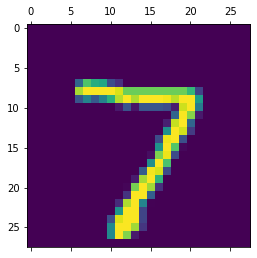

In [29]:
plt.matshow(x_test[0])

In [31]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.2348672e-02, 3.0251064e-07, 4.9529284e-02, 9.7205889e-01,
       1.1792779e-03, 9.6377611e-02, 1.2694532e-06, 9.9974799e-01,
       8.2875341e-02, 6.4181113e-01], dtype=float32)

In [32]:
#Prediction time
np.argmax(y_predicted[0])

7

In [34]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[0:5]

[7, 2, 1, 0, 4]

In [35]:
#Confusion matrix to evaluate performance
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    9,  934,   15,    6,    2,   11,    9,   36,    4],
       [   4,    0,   20,  928,    0,   20,    2,   11,   19,    6],
       [   1,    2,    7,    2,  888,    0,   14,    5,   11,   52],
       [   8,    3,    5,   44,    5,  768,   13,    6,   35,    5],
       [  12,    3,    7,    1,    7,   11,  913,    2,    2,    0],
       [   1,    6,   25,    7,    2,    0,    0,  949,    2,   36],
       [   7,    7,    7,   27,    8,   23,   10,    9,  869,    7],
       [  11,    7,    1,   12,   13,    8,    0,   16,    6,  935]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

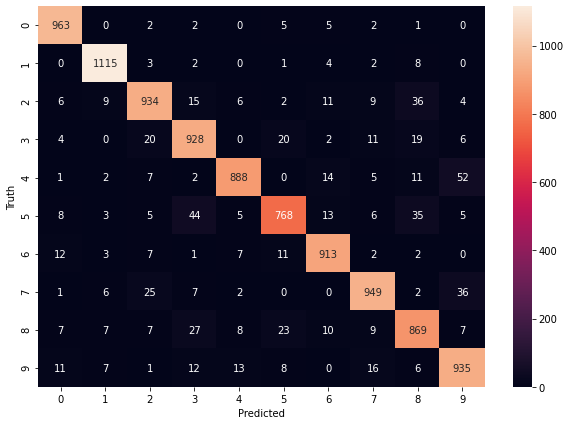

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
#We will add one more layer between two layers for better performance
#Building neural network
model = keras.Sequential([
                          keras.layers.Dense(109, input_shape = (784,), activation='relu'),
                          keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

#Compiling a model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training a model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4483 - accuracy: 0.8723
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1309 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0880 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9853


In [38]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9759


[0.07726326584815979, 0.9758999943733215]

In [39]:
y_predicted = model.predict(x_test_flattened)
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[0:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

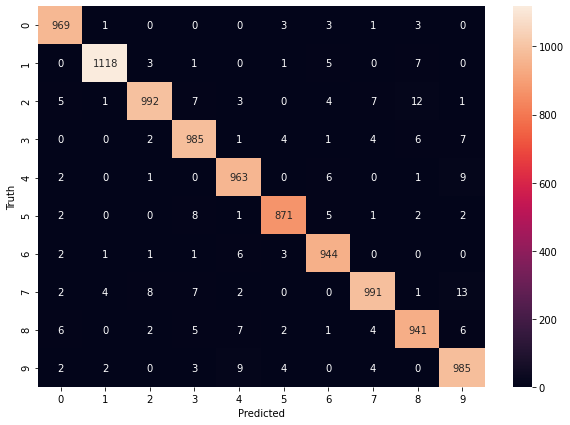

In [40]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
#Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4547 - accuracy: 0.8712
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1338 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9759


[0.08645043522119522, 0.9758999943733215]